In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [79]:
TD = pd.read_csv('TrainData.csv')
display(TD)

,TIMESTAMP,POWER,U10,V10,WS10,U100,V100,WS100
0,20120101 1:00,0.273678,0.534894,-3.660243,3.699120,0.765355,-4.486657,4.551468
1,20120101 2:00,0.086796,0.330813,-2.676430,2.696797,0.469875,-3.213752,3.247920
2,20120101 3:00,0.006811,-0.065839,-2.029072,2.030140,-0.020893,-2.418119,2.418209
3,20120101 4:00,0.018646,-0.419549,-1.799090,1.847362,-0.444867,-2.149654,2.195203
4,20120101 5:00,0.034812,-0.754224,-1.661526,1.824698,-0.838274,-1.991829,2.161038
...,...,...,...,...,...,...,...,...
16075,20131031 20:00,0.101254,-1.459917,-1.778960,2.301316,-1.974368,-4.936280,5.316483
16076,20131031 21:00,0.105047,-1.293326,-2.350447,2.682777,-0.781394,-4.903565,4.965433
16077,20131031 22:00,0.145079,-0.308284,-2.441885,2.461269,0.257905,-4.027432,4.035681
16078,20131031 23:00,0.180933,1.148765,-2.789011,3.016330,1.628004,-3.520358,3.878572


# Linear Regression Method

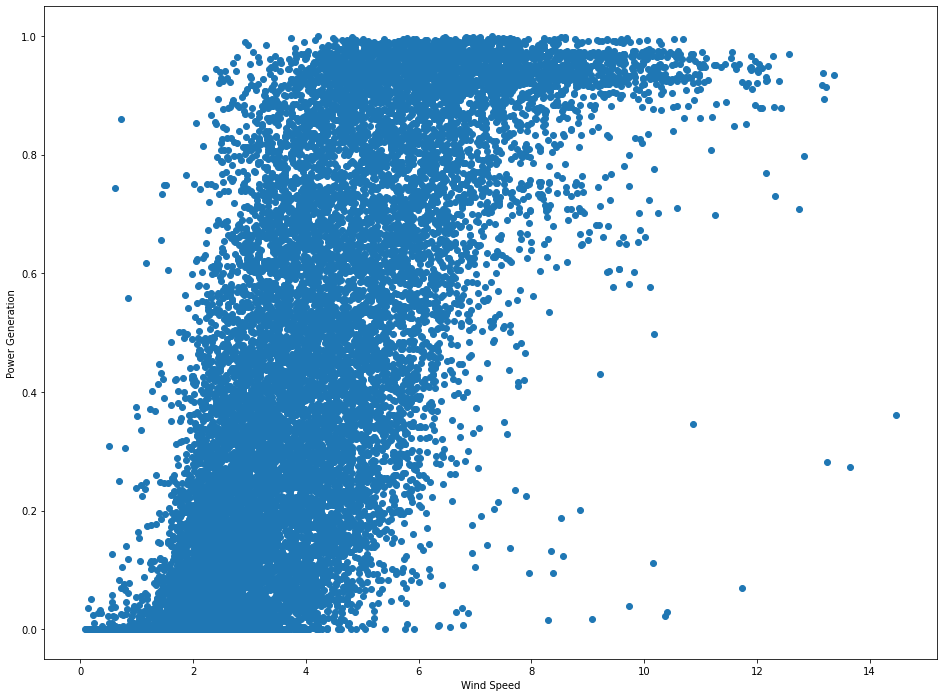

In [80]:
y = TD['POWER']
x = TD['WS10']


plt.scatter(x,y)
plt.xlabel('Wind Speed')
plt.ylabel('Power Generation')
plt.show()

In [81]:
X = TD['WS10'].values
Y = TD['POWER'].values

mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_X) * (y[i] - mean_Y)
    denom += (X[i] - mean_X) ** 2
b1 = numer / denom
b0 = mean_Y - (b1 * mean_X)

print(b1, b0)

0.12259335914949968 -0.08367458093320862


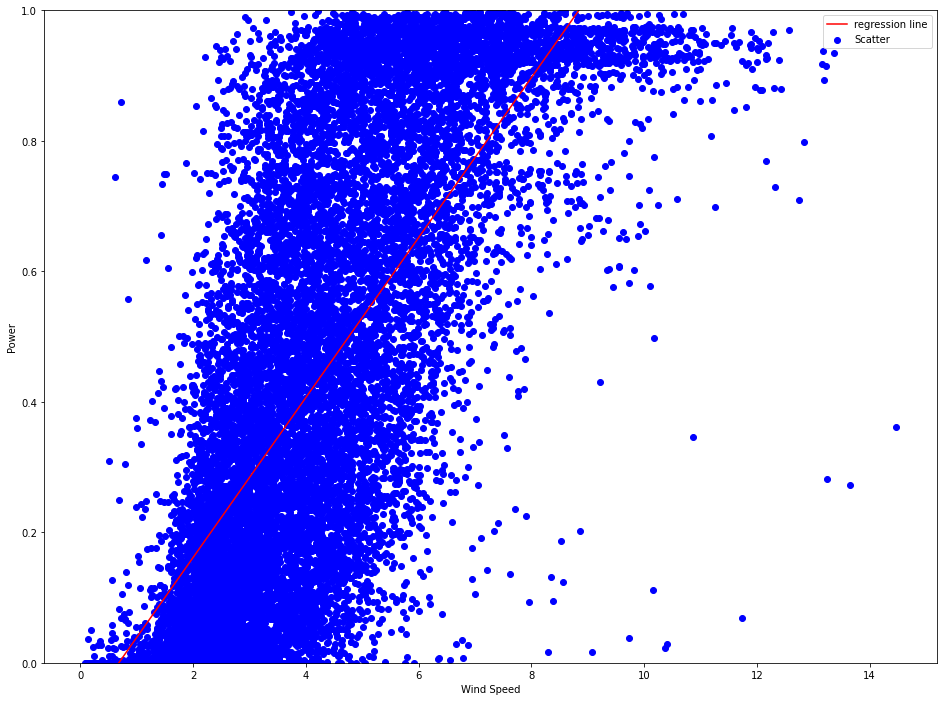

In [82]:
max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x, max_x, 10)
y = b0 + b1*x

plt.plot(x,y, color='r', label='regression line')

plt.scatter(X,Y,color='b', label='Scatter')

plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.ylim(0,1)
plt.legend()
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n,1))

reg = LinearRegression()

reg = reg.fit(X,Y)

Y_pred = reg.predict(X)

rmse = reg.score(X,Y)

print(rmse)


0.528641584310481


# Power generationfor November 2013

In [84]:
WFI = pd.read_csv('WeatherForecastInput.csv')
SOL = pd.read_csv('Solution.csv')
#WFI['datetime'] = pd.to_datetime(WFI['TIMESTAMP'], unit='h', origin='2013-11-01')

display(SOL)

,TIMESTAMP,POWER
0,20131101 1:00,0.167215
1,20131101 2:00,0.063998
2,20131101 3:00,0.039035
3,20131101 4:00,0.036232
4,20131101 5:00,0.064888
...,...,...
715,20131130 20:00,0.963328
716,20131130 21:00,0.948834
717,20131130 22:00,0.925991
718,20131130 23:00,0.773840


,TIMESTAMP,U10,V10,WS10,U100,V100,WS100,POWER,ActPower
0,20131101 1:00,3.462251,-1.066374,3.622753,4.323671,-1.330859,4.523861,0.360451,0.167215
1,20131101 2:00,3.651341,-0.337717,3.666925,4.532444,-0.451426,4.554870,0.365866,0.063998
2,20131101 3:00,3.657829,0.328049,3.672510,4.527268,0.341374,4.540120,0.366551,0.039035
3,20131101 4:00,3.551698,0.735371,3.627028,4.395563,0.818799,4.471175,0.360975,0.036232
4,20131101 5:00,3.586921,1.050811,3.737673,4.461128,1.251971,4.633475,0.374539,0.064888
...,...,...,...,...,...,...,...,...,...
715,20131130 20:00,-2.527419,-6.623859,7.089666,-3.648235,-11.876879,12.424567,0.785471,0.963328
716,20131130 21:00,-2.529020,-7.423845,7.842794,-3.553146,-12.504219,12.999244,0.877800,0.948834
717,20131130 22:00,-3.105103,-6.653005,7.341943,-4.423704,-12.561661,13.317825,0.816399,0.925991
718,20131130 23:00,-2.286417,-6.165074,6.575396,-2.957473,-9.009961,9.482934,0.722425,0.773840


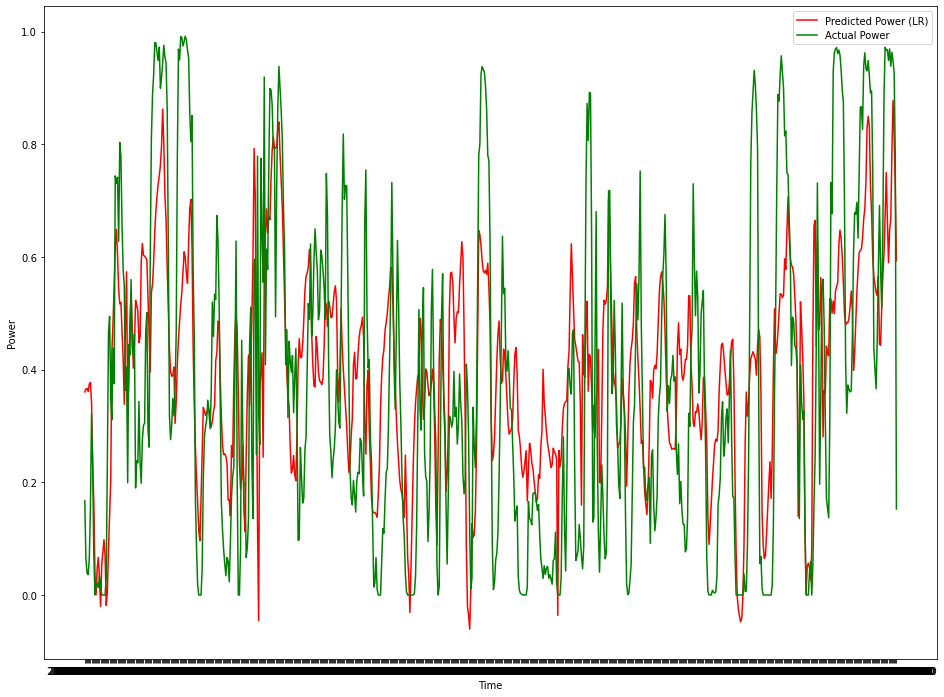

In [85]:
WFI['POWER'] = (WFI['WS10']*b1+b0)
WFI['ActPower'] = SOL['POWER']

display(WFI)

x = WFI['TIMESTAMP'].values
y = WFI['POWER']
y2 = WFI['ActPower']

plt.plot(x,y, color = 'r', label ='Predicted Power (LR)')
plt.plot(x,y2, color = 'g', label ='Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Time')

np.savetxt("ForecastTemplate1-LR.csv", y, delimiter=",")

Text(0.5, 0, 'Time')

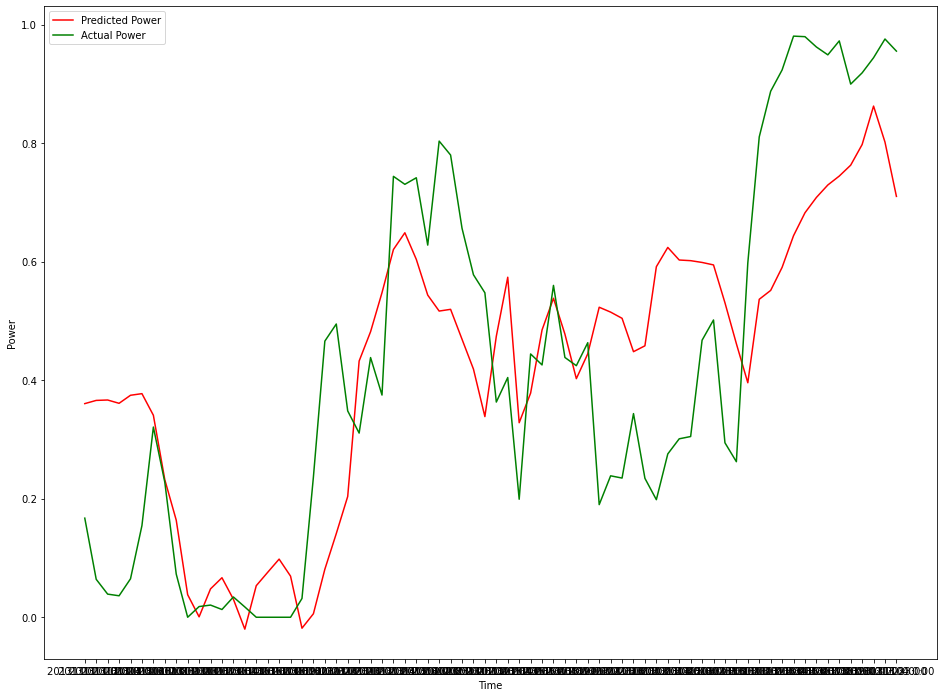

In [86]:
x_week = WFI.iloc[0:72]['TIMESTAMP']
y_week = WFI.iloc[0:72]['POWER']
y2_week = WFI.iloc[0:72]['ActPower']

plt.plot(x_week,y_week, color = 'r', label ='Predicted Power')
plt.plot(x_week,y2_week, color = 'g', label ='Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Time')

# kNN Method

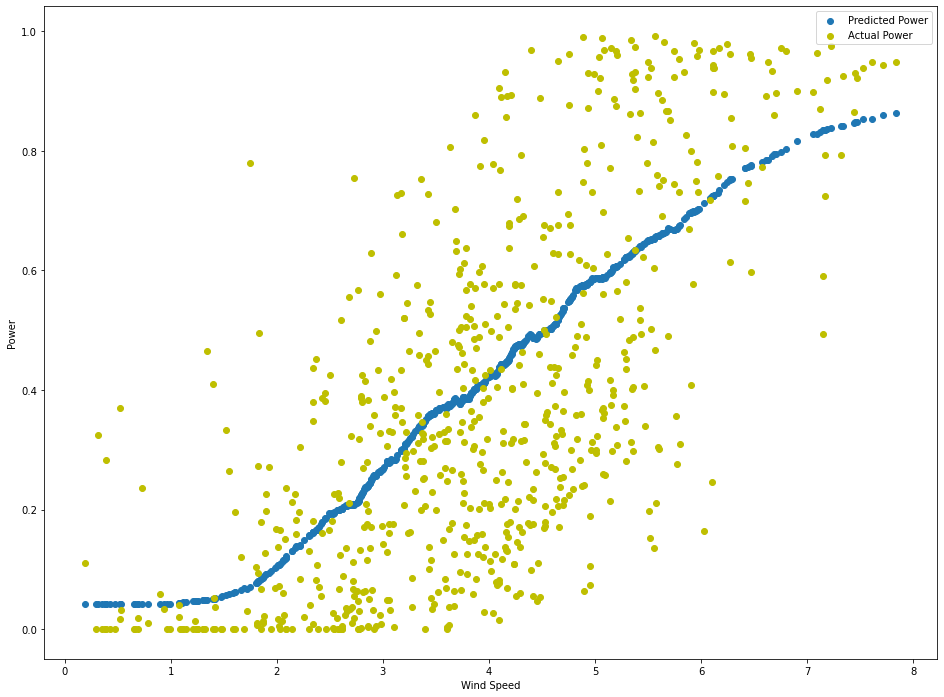

Mean Squared Error: 0.0468769567861126
Root Mean Squared Error: 0.21651086990290488


In [87]:
KNN = TD.copy()
WFI_1 = pd.read_csv('WeatherForecastInput.csv')
SOL_1 = pd.read_csv('Solution.csv')

WFI_1['POWER'] = SOL_1['POWER']

KNN = KNN[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10']]
WFI_1 = WFI_1[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10']]

# KNN is train data
# WFI_1 is test data

X_train = KNN.iloc[:, 4].values #WS10
X_train = X_train.reshape(-1,1)
#X_train = KNN.iloc[:, 2:4].values #X_train is U10 and V10
y_train = KNN.iloc[:, 1].values #y_train is POWER
y_train = y_train.reshape(-1,1)

X_test = WFI_1.iloc[:, 4].values #WS10
X_test = X_test.reshape(-1,1)
#X_test = WFI_1.iloc[:, 2:4].values #X_test is U10 and V10
y_test = WFI_1.iloc[:, 1].values #y_test is POWER

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

#x = WFI_1['TIMESTAMP']
x = WFI_1['WS10']
y = WFI_1['POWER']
plt.scatter(x,y_pred, label = 'Predicted Power')
plt.scatter(x, y, label = 'Actual Power', color = 'y')
#plt.plot(x, y_test, label = 'Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.show()

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

np.savetxt("ForecastTemplate1-kNN.csv", y_pred, delimiter=",")

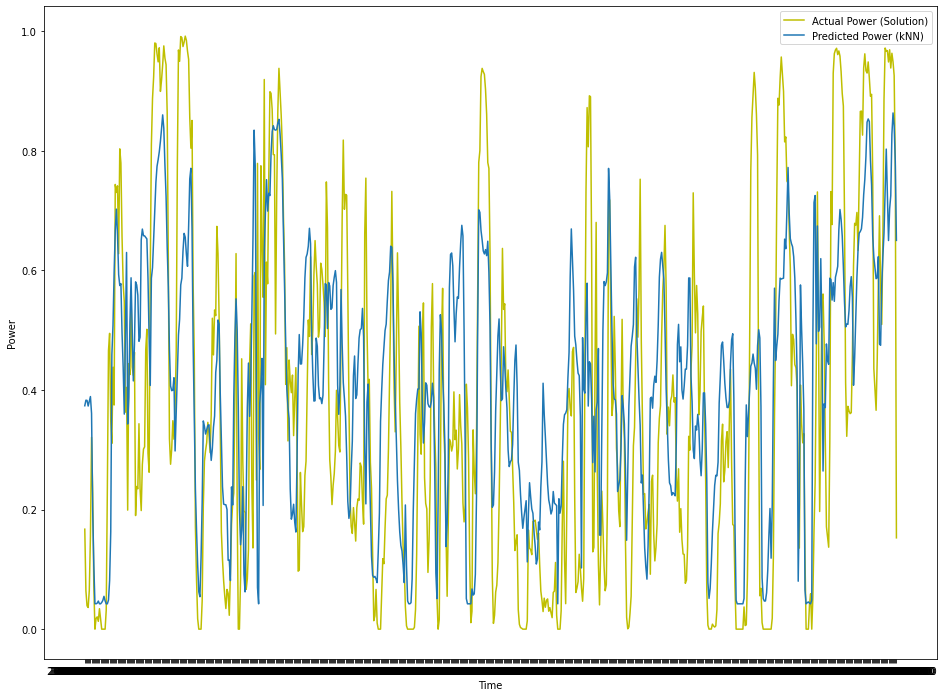

In [88]:
x1 = WFI_1.iloc[0:720]['TIMESTAMP']
y = WFI_1.iloc[0:720]['POWER']
y_2 = y_pred[0:720]
plt.plot(x1, y, label = 'Actual Power (Solution)', color = 'y')
plt.plot(x1, y_2, label = 'Predicted Power (kNN)')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()


#error = []

# Calculating error for K values between 1 and 40
#for i in range(1, 100):
#    knn = KNeighborsRegressor(n_neighbors=i)
#    knn.fit(X_train, y_train)
#    pred_i = knn.predict(X_test)
#    error.append(np.mean(pred_i != y_test))
    
#plt.figure(figsize=(12, 6))
#plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

# SVR

C:\Users\kaspe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


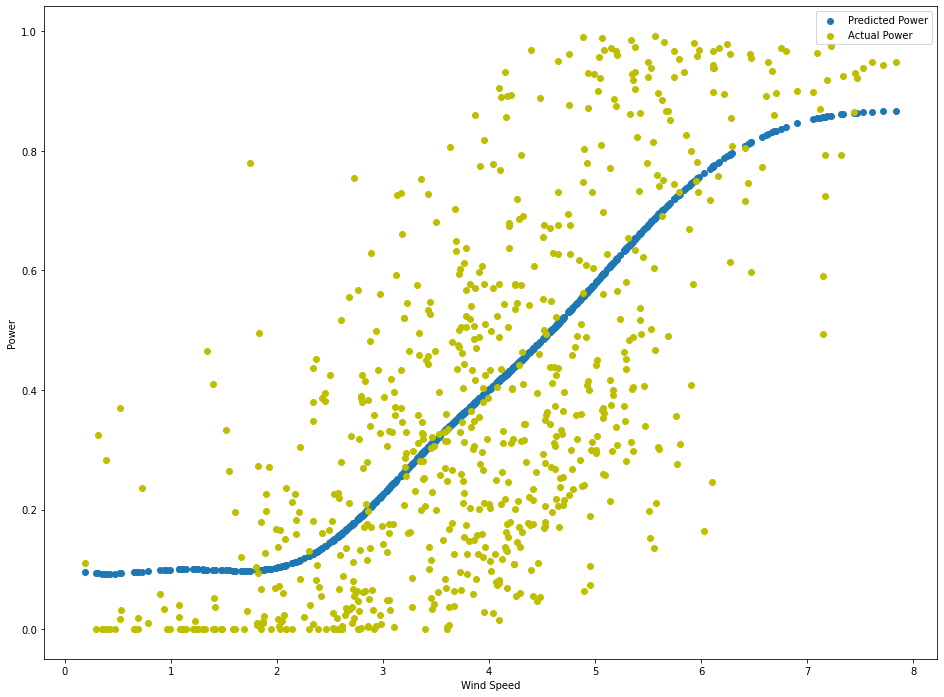

Mean Squared Error: 0.04567307790244441
Root Mean Squared Error: 0.21371260585759655


In [89]:
from sklearn import metrics, svm

SVR = TD.copy()
WFI_2 = pd.read_csv('WeatherForecastInput.csv')
SOL_2 = pd.read_csv('Solution.csv')

WFI_2['POWER'] = SOL_2['POWER']

SVR = SVR[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10']]
WFI_2 = WFI_2[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10']]

# KNN is train data
# WFI_1 is test data

#X_train = SVR.iloc[:, 2:4].values #X_train is U10 and V10
X_train = SVR.iloc[:, 4].values #X_Train in WS10
X_train = X_train.reshape(-1, 1)
y_train = SVR.iloc[:, 1].values #y_train is POWER
y_train = y_train.reshape(-1, 1)

#X_test = WFI_2.iloc[:, 2:4].values #X_test is U10 and V10
X_test = WFI_2.iloc[:, 4].values #X_test is WS10
X_test = X_test.reshape(-1, 1)

y_test = WFI_2.iloc[:, 1].values #y_test is POWER from solution
y_test = y_test.reshape(-1, 1)

clf = svm.SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

x = WFI_2['WS10']
#y = WFI_2['POWER']
plt.scatter(x,y_pred, label = 'Predicted Power')
plt.scatter(x, y_test, label = 'Actual Power', color = 'y')
#plt.plot(x, y_test, label = 'Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

np.savetxt("ForecastTemplate1-SVR.csv", y_pred, delimiter=",")

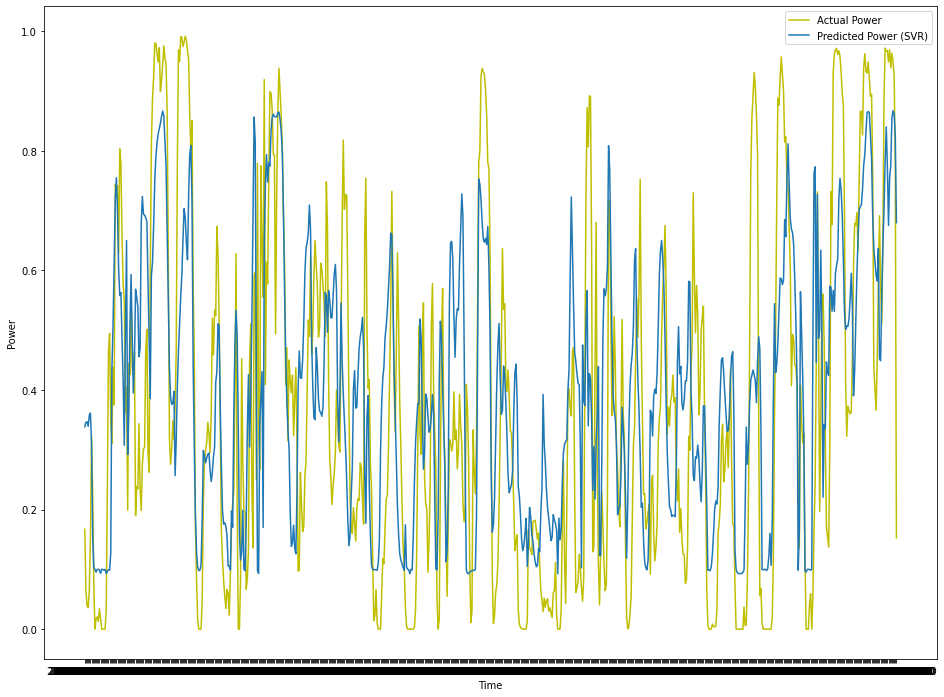

In [90]:
x1 = WFI_2['TIMESTAMP']
y = WFI_2['POWER']
y_3 = y_pred
plt.plot(x1, y, label = 'Actual Power', color = 'y')
plt.plot(x1, y_3, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()


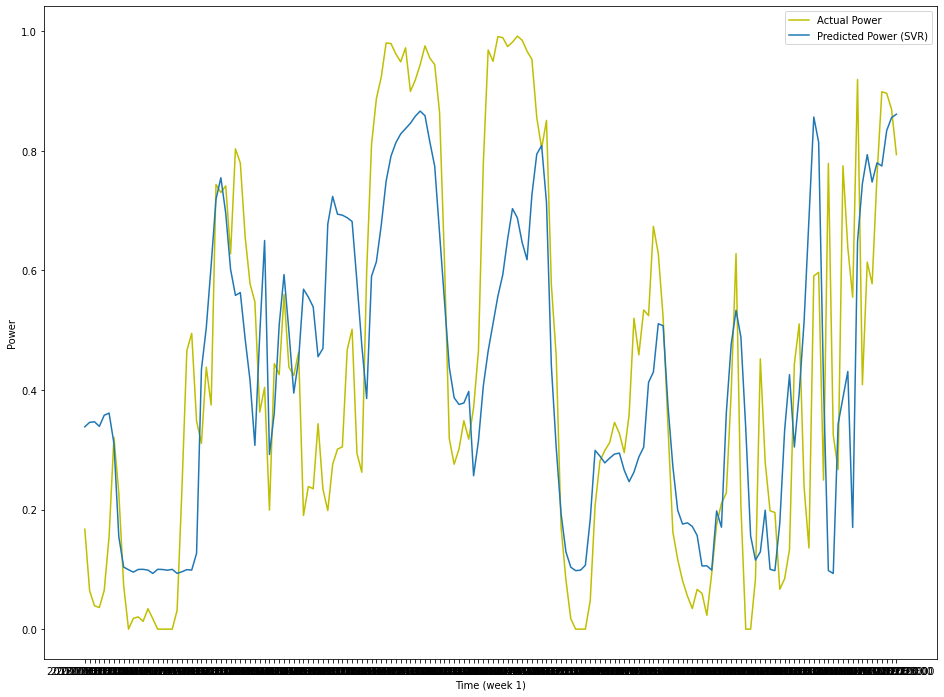

In [75]:
x_week_1 = WFI_2.iloc[0:168]['TIMESTAMP']
y_week_1 = WFI_2.iloc[0:168]['POWER']
y_pred_week_1 = y_pred[0:168]
plt.plot(x_week_1, y_week_1, label = 'Actual Power', color = 'y')
plt.plot(x_week_1, y_pred_week_1, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time (week 1)')
plt.legend()


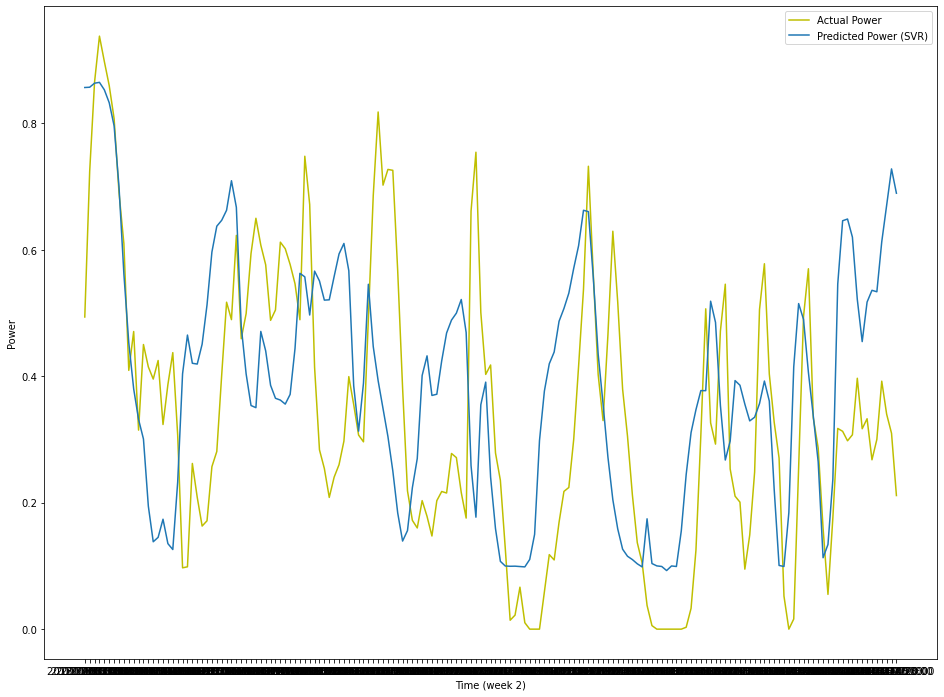

In [76]:
x_week_2 = WFI_2.iloc[169:336]['TIMESTAMP']
y_week_2 = WFI_2.iloc[169:336]['POWER']
y_pred_week_2 = y_pred[169:336]
plt.plot(x_week_2, y_week_2, label = 'Actual Power', color = 'y')
plt.plot(x_week_2, y_pred_week_2, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time (week 2)')
plt.legend()

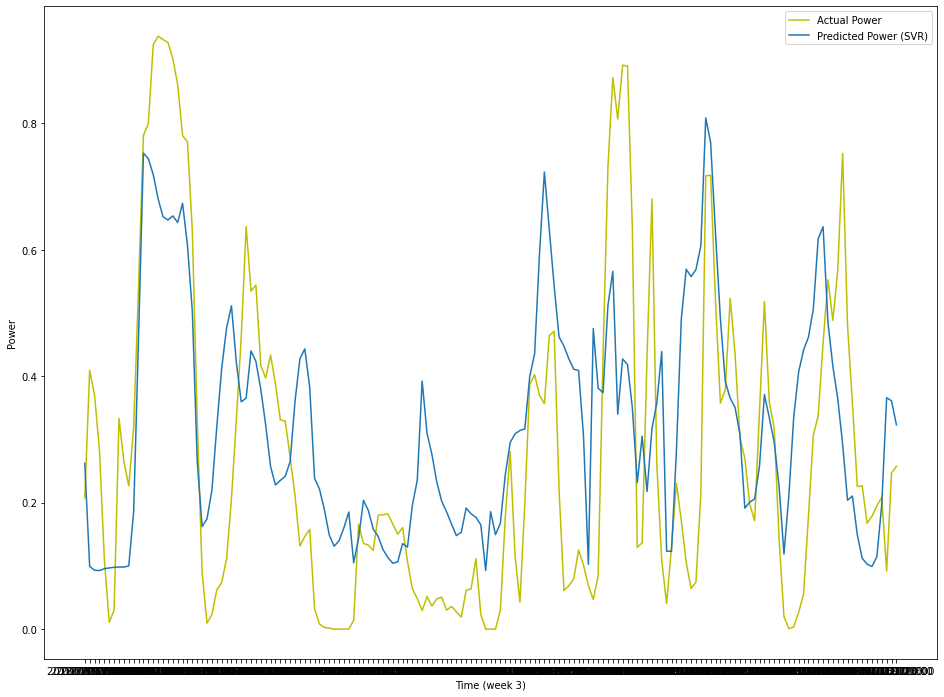

In [77]:
x_week_3 = WFI_2.iloc[337:504]['TIMESTAMP']
y_week_3 = WFI_2.iloc[337:504]['POWER']
y_pred_week_3 = y_pred[337:504]
plt.plot(x_week_3, y_week_3, label = 'Actual Power', color = 'y')
plt.plot(x_week_3, y_pred_week_3, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time (week 3)')
plt.legend()